In [3]:
import sys
!{sys.executable} -m pip install ta

You should consider upgrading via the 'c:\Users\12252\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import os
import pandas as pd
import ta
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import warnings
import numpy as np
import datetime as dt
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("Resources/BTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570313,63843.570313,49920425401
3503,2024-04-20,63851.101563,65442.457031,63172.402344,64994.441406,64994.441406,23097485495
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853


In [6]:
def label_dataset(t_horizon):
    for row in df.index:
        if row < len(df.index)-1:
            # Calculate the maximum value for the next t_horizon rows of high values.
            df.loc[row, f"Max_{t_horizon}"] = max(df.loc[(row + 1):(row + t_horizon), "High"]) 
            # Calculate the minimum value for the next t_horizon rows of low values.
            df.loc[row, f"Min_{t_horizon}"] = min(df.loc[(row+1):(row+t_horizon), "Low"])
            # Calculate the percentage gain from going long if exits at optimal price next 3 days
            df.loc[row, f"Max_{t_horizon}_Percent_Increase"] = ((df.loc[row, f"Max_{t_horizon}"] - df.loc[row, "Close"]) / df.loc[row, "Close"])
            # Calculate the percentage gain from going Short if exits at optimal price next 3 days 
            df.loc[row, f"Min_{t_horizon}_Percent_Increase"] = ((df.loc[row, "Close"] - df.loc[row, f"Min_{t_horizon}"]) / df.loc[row, "Close"])
            # What was the optimal move? (SHORT or LONG)
            df.loc[row, f"Choice_{t_horizon}"] = "LONG" if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else "SHORT"
            # What is the optimate gain?
            df.loc[row, f"Gain_{t_horizon}"] = df.loc[row, f"Max_{t_horizon}_Percent_Increase"] if df.loc[row, f"Max_{t_horizon}_Percent_Increase"] > df.loc[row, f"Min_{t_horizon}_Percent_Increase"] else df.loc[row, f"Min_{t_horizon}_Percent_Increase"]
label_dataset(3)
label_dataset(6)

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,Min_3_Percent_Increase,Choice_3,Gain_3,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,427.834991,384.532013,0.007999,0.094025,SHORT,0.094025,441.557007,384.532013,0.040328,0.094025,SHORT,0.094025
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,423.295990,389.882996,0.072189,0.012444,LONG,0.072189,441.557007,389.882996,0.118443,0.012444,LONG,0.118443
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,441.557007,393.181000,0.079855,0.038452,LONG,0.079855,441.557007,393.181000,0.079855,0.038452,LONG,0.079855
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,441.557007,396.196991,0.107156,0.006579,LONG,0.107156,441.557007,396.196991,0.107156,0.006579,LONG,0.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335,65723.242188,59651.390625,0.034804,0.060797,SHORT,0.060797,66481.984375,59651.390625,0.046750,0.060797,SHORT,0.060797
3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570313,63843.570313,49920425401,66481.984375,63172.402344,0.041326,0.010513,LONG,0.041326,66481.984375,63172.402344,0.041326,0.010513,LONG,0.041326
3503,2024-04-20,63851.101563,65442.457031,63172.402344,64994.441406,64994.441406,23097485495,66481.984375,64277.722656,0.022887,0.011027,LONG,0.022887,66481.984375,64277.722656,0.022887,0.011027,LONG,0.022887
3504,2024-04-21,64992.816406,65723.242188,64277.722656,64926.644531,64926.644531,20506644853,66481.984375,64621.988281,0.023955,0.004692,LONG,0.023955,66481.984375,64621.988281,0.023955,0.004692,LONG,0.023955


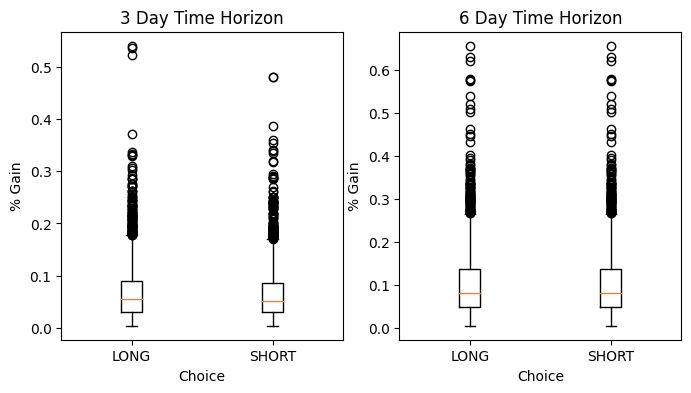

In [8]:
# Gains
gain_3_long = df[df["Choice_3"] == "LONG"]["Gain_3"]
gain_3_short = df[df["Choice_3"] == "SHORT"]["Gain_3"]
gain_6_long = df[df["Choice_6"] == "LONG"]["Gain_6"]
gain_6_short = df[df["Choice_6"] == "LONG"]["Gain_6"]

data = [gain_3_long, gain_3_short]
data_2 = [gain_6_long, gain_6_short]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.set_title('3 Day Time Horizon')
ax1.boxplot(data, labels = ["LONG","SHORT"])
ax1.set_xlabel("Choice")
ax1.set_ylabel("% Gain")

ax2.set_title('6 Day Time Horizon')
ax2.boxplot(data_2, labels = ["LONG","SHORT"])
ax2.set_xlabel("Choice")
ax2.set_ylabel("% Gain")

plt.show()


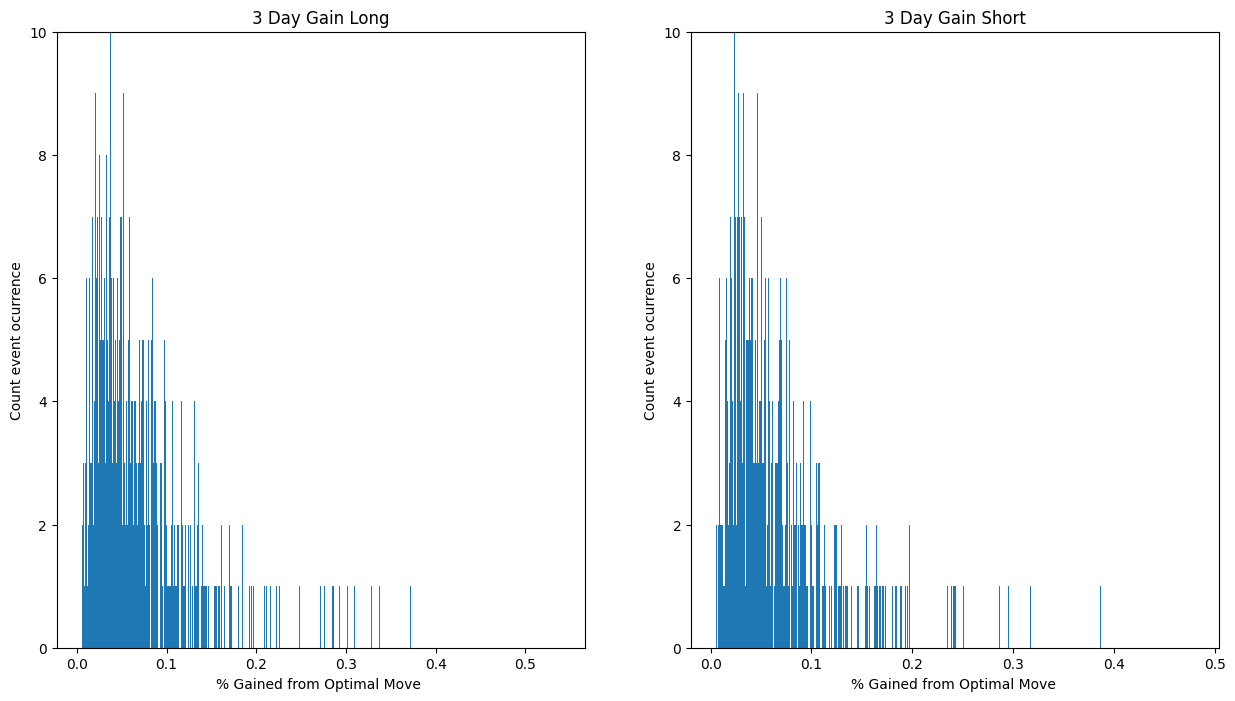

In [9]:
# Gains
gain_3_long = df[df["Choice_3"] == "LONG"]["Gain_3"]
gain_3_short = df[df["Choice_3"] == "SHORT"]["Gain_3"]
gain_6_long = df[df["Choice_6"] == "LONG"]["Gain_6"]
gain_6_short = df[df["Choice_6"] == "LONG"]["Gain_6"]

data = [gain_3_long, gain_3_short]
data_2 = [gain_6_long, gain_6_short]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.set_title('3 Day Gain Long')
# ax1.boxplot(data, labels = ["LONG","SHORT"])
ax1.set_xlabel("% Gained from Optimal Move ")
ax1.set_ylabel("Count event ocurrence")
ax1.set_ylim(0,10)

ax2.set_title('3 Day Gain Short')
# ax2.boxplot(data_2, labels = ["LONG","SHORT"])
ax2.set_xlabel("% Gained from Optimal Move ")
ax2.set_ylabel("Count event ocurrence")
ax2.set_ylim(0,10)

N_points = 100000
n_bins = 2000

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
ax1.hist(gain_3_long, bins=n_bins)
ax2.hist(gain_3_short, bins=n_bins)

plt.show()

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,Min_3_Percent_Increase,Choice_3,Gain_3,Max_6,Min_6,Max_6_Percent_Increase,Min_6_Percent_Increase,Choice_6,Gain_6
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188,456.859985,384.532013,-0.001037,0.159188,SHORT,0.159188
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,0.094025,SHORT,0.094025,441.557007,384.532013,0.040328,0.094025,SHORT,0.094025
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,0.012444,LONG,0.072189,441.557007,389.882996,0.118443,0.012444,LONG,0.118443
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,0.038452,LONG,0.079855,441.557007,393.181000,0.079855,0.038452,LONG,0.079855
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,0.006579,LONG,0.107156,441.557007,396.196991,0.107156,0.006579,LONG,0.107156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,0.064365,SHORT,0.064365,11095.870117,10380.260742,0.000137,0.064365,SHORT,0.064365
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,0.051015,SHORT,0.051015,10988.304688,10380.260742,0.004574,0.051015,SHORT,0.051015
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,0.007602,LONG,0.011909,10586.853516,10382.726563,0.011909,0.007602,LONG,0.011909
2197,2020-09-22,10459.624023,10568.077148,10382.726563,10538.459961,10538.459961,2.362179e+10,10586.853516,10398.071289,0.004592,0.013322,SHORT,0.013322,10586.853516,10398.071289,0.004592,0.013322,SHORT,0.013322


In [9]:
# Clean NaN values
df = ta.utils.dropna(df)

In [12]:
def day_of_week_standard_form(string_date):
    date_object = dt.datetime.strptime(string_date, "%Y-%m-%d")
    return date_object.dayofweek

# Exponential Moving Averages indicators
ema_6 = ta.trend.ema_indicator(close = df["Close"], window= 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window= 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window= 24)

# RSI indicators
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window= 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window= 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window= 28)



# Create new columns based on the indicators
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()
# df["Weekday"] = df["Date"].map(day_of_week_standard_form)

df["Date"] = df["Date"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
df["Weekday"] = df["Date"].dt.dayofweek



In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Max_3,Min_3,Max_3_Percent_Increase,...,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,Weekday
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,456.859985,384.532013,-0.001037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,427.834991,384.532013,0.007999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,423.295990,389.882996,0.072189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,441.557007,393.181000,0.079855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,441.557007,396.196991,0.107156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2020-09-18,10951.820313,11034.908203,10829.657227,10944.585938,10944.585938,2.634190e+10,11134.092773,10380.260742,0.017315,...,10809.668685,10737.571828,10831.084798,0.987673,0.981085,0.989629,62.123761,52.050299,51.523217,4
2194,2020-09-19,10933.752930,11134.092773,10909.618164,11094.346680,11094.346680,2.276420e+10,11095.870117,10380.260742,0.000137,...,10891.005255,10792.460267,10852.145749,0.981672,0.972789,0.978169,67.845442,54.970132,52.902128,5
2195,2020-09-20,11095.870117,11095.870117,10814.477539,10938.271484,10938.271484,2.469952e+10,10988.304688,10380.260742,0.004574,...,10904.509892,10814.892762,10859.035808,0.996913,0.988720,0.992756,57.317844,51.453646,51.324314,6
2196,2020-09-21,10934.925781,10988.304688,10380.260742,10462.259766,10462.259766,2.888500e+10,10586.853516,10382.726563,0.011909,...,10778.152713,10760.641532,10827.293724,1.030194,1.028520,1.034891,36.928573,42.519744,46.900117,0


In [14]:
df.dropna(inplace = True)

In [15]:
# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)
RANDOM_STATE = 123
# Generate a binary classification dataset.
# X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                           random_state=RANDOM_STATE)

X = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "Weekday"]]

y = df["Choice_3"]

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="auto",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
error_rate_test = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 500
time_step = 5
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators, time_step):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        oob_error_test = 1 - clf.score(X_test, y_test)
        error_rate_test[label].append((i, oob_error_test))

Automatically created module for IPython interactive environment


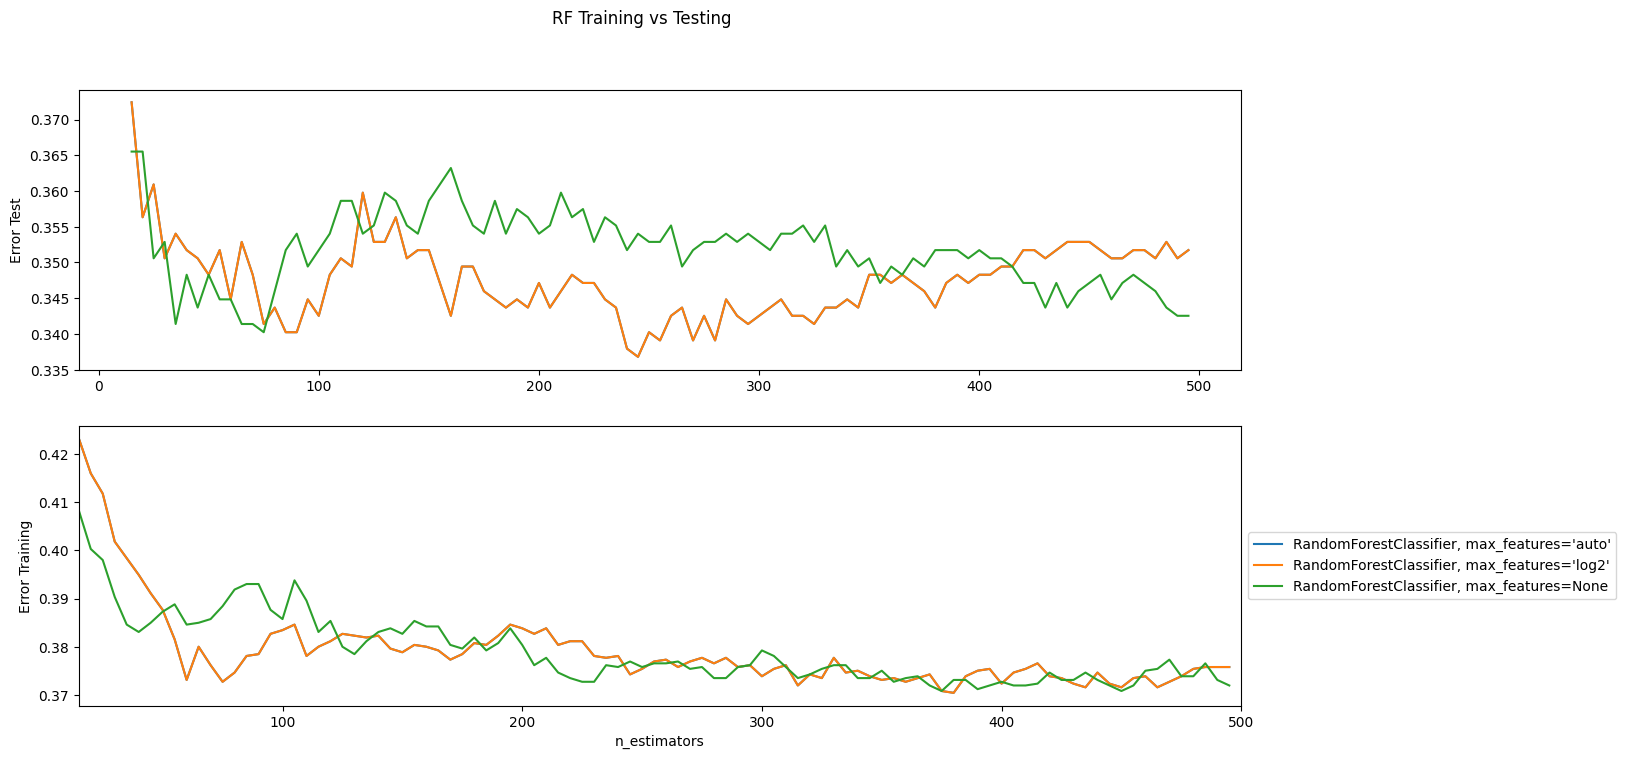

In [17]:
fig, axs = plt.subplots(2, figsize=(15, 8))
fig.suptitle('RF Training vs Testing')

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate_test.items():
    xs, ys = zip(*clf_err)
    axs[0].plot(xs, ys, label=label)
    
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    axs[1].plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
axs[1].set_ylabel("Error Training")
axs[0].set_ylabel("Error Test")

# plt.legend(loc="outside")
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.ylim(0,0.40)
plt.show()



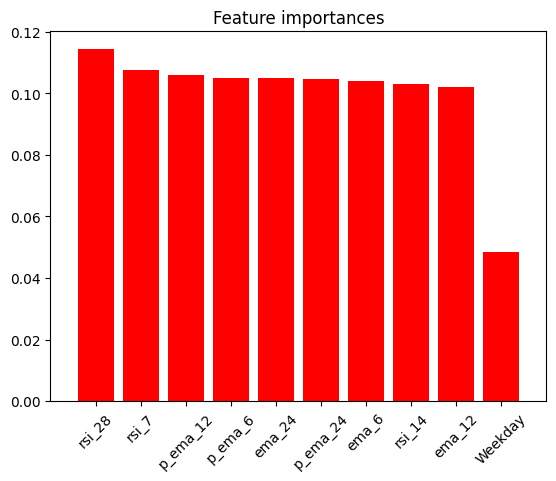

In [18]:
import numpy as np
labels = []

clf = RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

clf.set_params(n_estimators=350)

clf.fit(X_train, y_train)

# Record the OOB error for each `n_estimators=i` setting.
oob_error = 1 - clf.oob_score_
error_rate[label].append((i, oob_error))
oob_error_test = 1 - clf.score(X_test, y_test)
error_rate_test[label].append((i, oob_error_test))

# Which variables in the model are important?
importances = clf.feature_importances_

# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#             axis=0)
indices = np.argsort(importances)[::-1]

# for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

columns = X.columns.values.tolist()

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices,rotation = 45)
plt.xlim([-1, X.shape[1]])

plt.xticks(ticks = range(X.shape[1]), labels = [columns[i] for i in indices])

plt.show()

In [16]:
# We can sort the features by their importance
indicator_ranking = sorted(zip(clf.feature_importances_, columns), reverse=True)
indicator_ranking

[(0.11243854135958702, 'rsi_28'),
 (0.11099391208401327, 'ema_24'),
 (0.10712281744213578, 'ema_12'),
 (0.10705602246771549, 'rsi_7'),
 (0.10472814086756908, 'p_ema_24'),
 (0.10376896580476602, 'ema_6'),
 (0.10218430076354561, 'p_ema_12'),
 (0.10210081670192175, 'rsi_14'),
 (0.09826843610706594, 'p_ema_6'),
 (0.05133804640168007, 'Weekday')]

In [19]:
print(f"The success rate of our model is: {clf.oob_score_}")

The success rate of our model is: 0.6269171779141104


In [20]:
x = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28", "Weekday"]]
x["model_predictions"] = clf.predict(x)
x["target_values"] = y

In [21]:
x

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,Weekday,model_predictions,target_values
27,379.306277,372.884433,381.625049,0.946208,0.930188,0.951992,71.956219,56.293392,48.558885,1,SHORT,SHORT
28,383.725343,376.251907,382.676886,0.972015,0.953084,0.969359,65.644923,53.755190,47.154156,2,SHORT,SHORT
29,383.391245,377.221767,382.667215,1.002183,0.986056,1.000291,54.475130,48.988694,44.480312,3,LONG,LONG
30,383.496031,378.227341,382.754478,0.999317,0.985588,0.997385,55.347251,49.463490,44.799679,4,LONG,LONG
31,385.766304,380.260363,383.449478,0.985501,0.971435,0.979582,60.929485,52.506761,46.827403,5,SHORT,SHORT
...,...,...,...,...,...,...,...,...,...,...,...,...
3500,64208.742409,65814.444593,66644.274019,1.047849,1.074053,1.087596,29.011040,38.816389,47.045803,2,LONG,LONG
3501,64009.888551,65460.338333,66393.752410,1.007827,1.030664,1.045361,40.835688,44.081793,49.481194,3,SHORT,SHORT
3502,63962.369054,65211.604792,66189.737842,1.001861,1.021428,1.036749,42.489160,44.838143,49.835163,4,LONG,LONG
3503,64257.246869,65178.195040,66094.114127,0.988658,1.002827,1.016919,48.347989,47.498653,51.071974,5,LONG,LONG


In [22]:
real_dates = [i for i in x["Date"].tolist() if str(i) not in df_2["Date"].tolist()]
real_dates

KeyError: 'Date'

In [25]:
df_2 = df.copy()

df = pd.read_csv("Resources/BTC-USD.csv")

# Function to label the data frame
label_dataset(3)

real_dates = [i for i in df["Date"] if str(i) not in df_2["Date"].tolist()]

# Exponential Moving Averages indicators
ema_6 = ta.trend.ema_indicator(close = df["Close"], window = 6)
ema_12 = ta.trend.ema_indicator(close = df["Close"], window = 12)
ema_24 = ta.trend.ema_indicator(close = df["Close"], window = 24)

# RSI indicators
rsi_14 = ta.momentum.RSIIndicator(df["Close"], window = 14)
rsi_7 = ta.momentum.RSIIndicator(df["Close"], window = 7)
rsi_28 = ta.momentum.RSIIndicator(df["Close"], window = 28)

# Create new columns based on the indicators
df["ema_6"] = ema_6
df["ema_12"] = ema_12
df["ema_24"] = ema_24
df["p_ema_6"] = df["ema_6"] / df["Close"]
df["p_ema_12"] = df["ema_12"] / df["Close"]
df["p_ema_24"] = df["ema_24"] / df["Close"]
df["rsi_7"] = rsi_7.rsi()
df["rsi_14"] = rsi_14.rsi()
df["rsi_28"] = rsi_28.rsi()
df["Date"] = df["Date"].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
df["Weekday"] = df["Date"].dt.dayofweek

# Clean NaN values
df = ta.utils.dropna(df)

x = df[["ema_6", "ema_12", "ema_24", "p_ema_6", "p_ema_12", "p_ema_24", "rsi_7", "rsi_14", "rsi_28","Weekday"]]
x["model_predictions"] = clf.predict(x)
x["target_values"] = df["Choice_3"]
x["Date"] = df["Date"]

x.set_index("Date", inplace = True)

a = 0
b = len(real_dates) - 1

#real_predict = x.loc[real_dates[0]:real_dates[b],:]
x

,ema_6,ema_12,ema_24,p_ema_6,p_ema_12,p_ema_24,rsi_7,rsi_14,rsi_28,Weekday,model_predictions,target_values
Date,,,,,,,,,,,,
2014-10-14,379.306277,372.884433,381.625049,0.946208,0.930188,0.951992,71.956219,56.293392,48.558885,1.0,SHORT,SHORT
2014-10-15,383.725343,376.251907,382.676886,0.972015,0.953084,0.969359,65.644923,53.755190,47.154156,2.0,SHORT,SHORT
2014-10-16,383.391245,377.221767,382.667215,1.002183,0.986056,1.000291,54.475130,48.988694,44.480312,3.0,LONG,LONG
2014-10-17,383.496031,378.227341,382.754478,0.999317,0.985588,0.997385,55.347251,49.463490,44.799679,4.0,LONG,LONG
2014-10-18,385.766304,380.260363,383.449478,0.985501,0.971435,0.979582,60.929485,52.506761,46.827403,5.0,SHORT,SHORT
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,64208.742409,65814.444593,66644.274019,1.047849,1.074053,1.087596,29.011040,38.816389,47.045803,2.0,LONG,LONG
2024-04-18,64009.888551,65460.338333,66393.752410,1.007827,1.030664,1.045361,40.835688,44.081793,49.481194,3.0,SHORT,SHORT
2024-04-19,63962.369054,65211.604792,66189.737842,1.001861,1.021428,1.036749,42.489160,44.838143,49.835163,4.0,LONG,LONG


In [ ]:
x

In [ ]:
real_predict

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(real_predict["target_values"], real_predict["model_predictions"])

print(conf_mat)